# Lab - Data-Centric Evaluation of ML Models

This lab is intended to accompany the lecture on Data-Centric Evaluation of ML Models. In this lab, you are given a training dataset and your goal is to improve the dataset in order to boost the accuracy of a fixed classification model on a given (fixed) test dataset. Reviewing the lecture notes will be helpful to get some ideas.

You can get all the dependencies you need for this notebook by running:

In [ ]:
!pip install cleanlab matplotlib

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score

import matplotlib.pyplot as plt

In [2]:
SEED = 123
np.random.seed(SEED)  # for reproducibility

# Load dataset

The data come from a 3-class classification task where the goal is to predict `y` based on features `x1`, ..., `x5`.
We convert the data to a numpy array format.

In [20]:
df = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

In [4]:
df.head()

,x0,x1,x2,x3,x4,x5,y
0,-0.333489,-0.770208,-2.697486,-0.628563,-1.277720,100.0,2
1,-0.787124,1.230800,1.415472,-0.805927,0.175115,100.0,1
2,0.781197,-0.856227,2.138879,2.495417,0.868192,100.0,1
3,1.895093,-0.885939,1.946352,-2.082747,0.064914,100.0,1
4,0.689091,-5.091299,-2.218682,0.330767,3.012755,100.0,2


In [5]:
df_test.head()

,x0,x1,x2,x3,x4,x5,y
0,2.337701,-0.681121,1.883774,0.949812,-0.311507,-100.0,1
1,1.101249,-2.032961,0.344490,0.724925,1.355534,-100.0,2
2,1.791349,-2.808856,-1.409471,0.552069,0.433901,100.0,2
3,2.082599,0.811498,0.906920,-0.749352,1.974424,-100.0,2
4,1.214627,-0.448392,1.812024,0.429543,0.396450,-100.0,1


In [6]:
y = df["y"].values
df.drop(columns=["y"], inplace=True)
X = df.values

y_test = df_test["y"].values
df_test.drop(columns=["y"], inplace=True)
X_test = df_test.values

print(X)
print(y)

[[  -0.33348927   -0.7702077    -2.69748604   -0.62856274   -1.27772042
   100.        ]
 [  -0.7871239     1.23080016    1.41547226   -0.8059272     0.1751147
   100.        ]
 [   0.78119711   -0.85622725    2.13887864    2.49541712    0.86819164
   100.        ]
 ...
 [   1.19101444   -1.72465036   -1.17854745   -1.54881816   -1.51740071
  -100.        ]
 [  -2.03358571   -0.23977122    1.21509471    0.86023614    0.69816843
   100.        ]
 [   0.15125519   -1.21711969    2.77498591    0.7090941     0.89159205
  -100.        ]]
[2 1 1 ... 2 1 1]


Here's a simple plot of the first two features, colored by class. Visualizing the dataset may be helpful to you in this assignment, but can be tricky with 6-dimensional features!

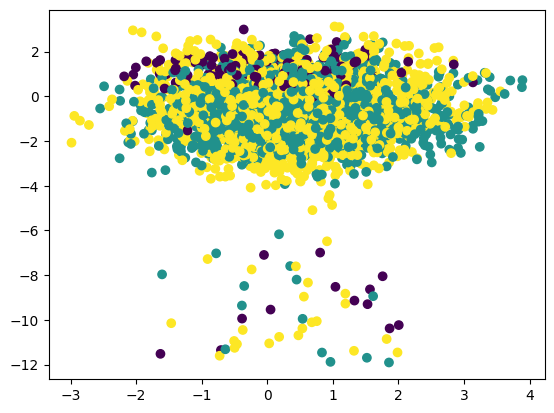

In [7]:
plt.scatter(X[:,0], X[:,1], c=list(y))

# Improve ML Model via data-centric techniques

We train a simple neural network model (Multi-Layer Perceptron classifier) and evaluate it on the given test set. 
Note that the evaluation metric used is `balanced_accuracy`. This is the accuracy amongst all examples in a given class, averaged over all classes, which better represents performance on minority classes.

You should never change the test data labels `y_test` in this lab, nor the neural network model. You may change the training data `X`, `y` as you see fit, and update `X_test` accordingly so your model is able to make predictions on it.

In [9]:
def train_evaluate_model(X, y, X_test, y_test):
    model = MLPClassifier(early_stopping=True, random_state=SEED)
    model.fit(X, y)
    predictions = model.predict(X_test)
    acc = balanced_accuracy_score(y_true=y_test, y_pred=predictions)
    print(f"Balanced accuracy = {acc}")
    return predictions

A baseline version of the model is trained on the original given data:

In [10]:
predictions = train_evaluate_model(X, y, X_test, y_test)

Balanced accuracy = 0.5759397707696671


# Exercise

Your goal is to produce a version of this same model that has much better test accuracy! 
You should accomplish this by changing `X` and `y` as you see fit. Consider various ideas presented in the lecture and look through the data yourself to see if other ideas come to mind! Greater than 80% test accuracy is achievable without modifying the model at all. If you choose to drop/add features to `X` or renormalize some values, then you'll want to apply these operations to `X_test` as well.

In [ ]:
## TODO: find my_X, my_y such that train_evaluate_model(my_X, my_y, X_test, y_test)
## reports better (higher) performance.


# Ideas for solutions

Here is one way to about this exercise, but there are many other good ideas out there.
We first break down the accuracies per class, since this is key step in the computation of balanced accuracy.

In [11]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predictions)
print(f"Per-class accuracies: {matrix.diagonal()/matrix.sum(axis=1)}")

Per-class accuracies: [0.01169591 0.86765513 0.84846827]


Above we see that our model has extremely poor accuracy on class 0. 
Next we look at the standard deviation of each feature to see if anything looks abnormal.

In [12]:
print(f"Standard-deviation of each feature: {np.apply_along_axis(np.std, 0, X)}")

Standard-deviation of each feature: [ 1.02232649  1.57979752  1.61943279  1.11450537  1.12908644 99.99614065]


Here we see the last feature has some extreme values, so we simply consider dropping it from the data.

In [13]:
feature_to_drop = X.shape[1] - 1
X = np.delete(X, feature_to_drop, axis=1)
X_test = np.delete(X_test, feature_to_drop, axis=1)

In [14]:
predictions = train_evaluate_model(X, y, X_test, y_test)

Balanced accuracy = 0.6971385953816448


We this simple change already provided significant model improvement. Now we study the distribution of classes in the data and see that class 0 appears to be somewhat rare.

In [15]:
for k in range(max(y)+1):
    print(f"number of examples labeled as class {k}: {np.sum(y==k)}")

rare_class = 0

number of examples labeled as class 0: 178
number of examples labeled as class 1: 1856
number of examples labeled as class 2: 1836


We next try dropping outliers from the data. Here we avoid dropping examples from this rare class to avoid making it even rare.

In [16]:
from cleanlab.outlier import OutOfDistribution

n_outlier = 100  # try different values to determine good one

knn = sklearn.neighbors.NearestNeighbors(n_neighbors=10).fit(X)
ood = OutOfDistribution({"knn": knn})  # find outliers based on Euclidean nearest neighbors rather than cleanlab's cosine distance default
ood_scores = ood.score(features=X)
outlier_examples = np.argsort(ood_scores)[:n_outlier]
outlier_examples = [out for out in outlier_examples if y[out] != rare_class]  # do not delete rare-class examples

X = np.delete(X, outlier_examples, axis=0)
y =  np.delete(y, outlier_examples)

In [17]:
predictions = train_evaluate_model(X, y, X_test, y_test)

Balanced accuracy = 0.7001792012008629


Finally we try up-sampling examples from the rare class so it is more prevalent in the dataset.

In [18]:
n_upsample = 10

rareclass_X = X[y == rare_class,:]
for n in range(n_upsample):
    X = np.concatenate((X, rareclass_X + 0.001*np.random.rand(rareclass_X.shape[0],rareclass_X.shape[1])))

y = np.concatenate((y, np.array([rare_class]*int(n_upsample*np.sum(y==rare_class)))))

In [19]:
predictions = train_evaluate_model(X, y, X_test, y_test)

Balanced accuracy = 0.8373993250881112


With these tricks we have improved the accuracy of our model quite a bit! And this was all accomplished by improving the training data only without any change to the model. You could achieve further accuracy gains by tinkering with the model and its training procedure.